# Comparing Heart Rate while Running and Biking: Histogram, Lineplot, Autocorrelation

In these final plots, I wanted to do a comparison of Running and Biking. I thought that I would look at how heart rate varies while biking and running. I accomplished this using first a histogram to take a look at heart rate frequencies, and then by a line plot that shows the relationship between distance and heart rate. I also plotted an autocorrelation of heart rate while running and biking to see if there was a periodic pattern to heart rate as the subject reached greater distances. 

Again, importing our libraries and reading in our csv files

In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df_filtered = pd.read_csv('./csv/df_filtered.csv')
autocorr_bike = pd.read_csv('./csv/df_autocorr_bike.csv')
autocorr_run = pd.read_csv('./csv/df_autocorr_run.csv')

In [8]:
autocorr_run.head()

,Unnamed: 0,autocorr_run
0,0,0.774450
1,1,0.773151
2,2,0.750501
3,3,0.771016
4,4,0.804433


When making these plots, I grouped the data using the `Used_Bike?` column in order to separate our biking and running sessions. For the histogram, I used seaborn's built in parameter of `kde` to also plot the distribution of the two groups. I decided to also plot density instead of raw counts for the histogram in order to show relative frequencies. The line plot was structured very similarly with the heart rate on the x axis. This provided a way clearer view of the data rather than plotting distance on the x axis. When I reversed the axes, the data came out very cluttered, and the running line was obscured by the biking line. 

For the autocorrelation, the lag on the x axis is over distance. So this means, I am taking a look at how the heart rate correlates as the distance increases

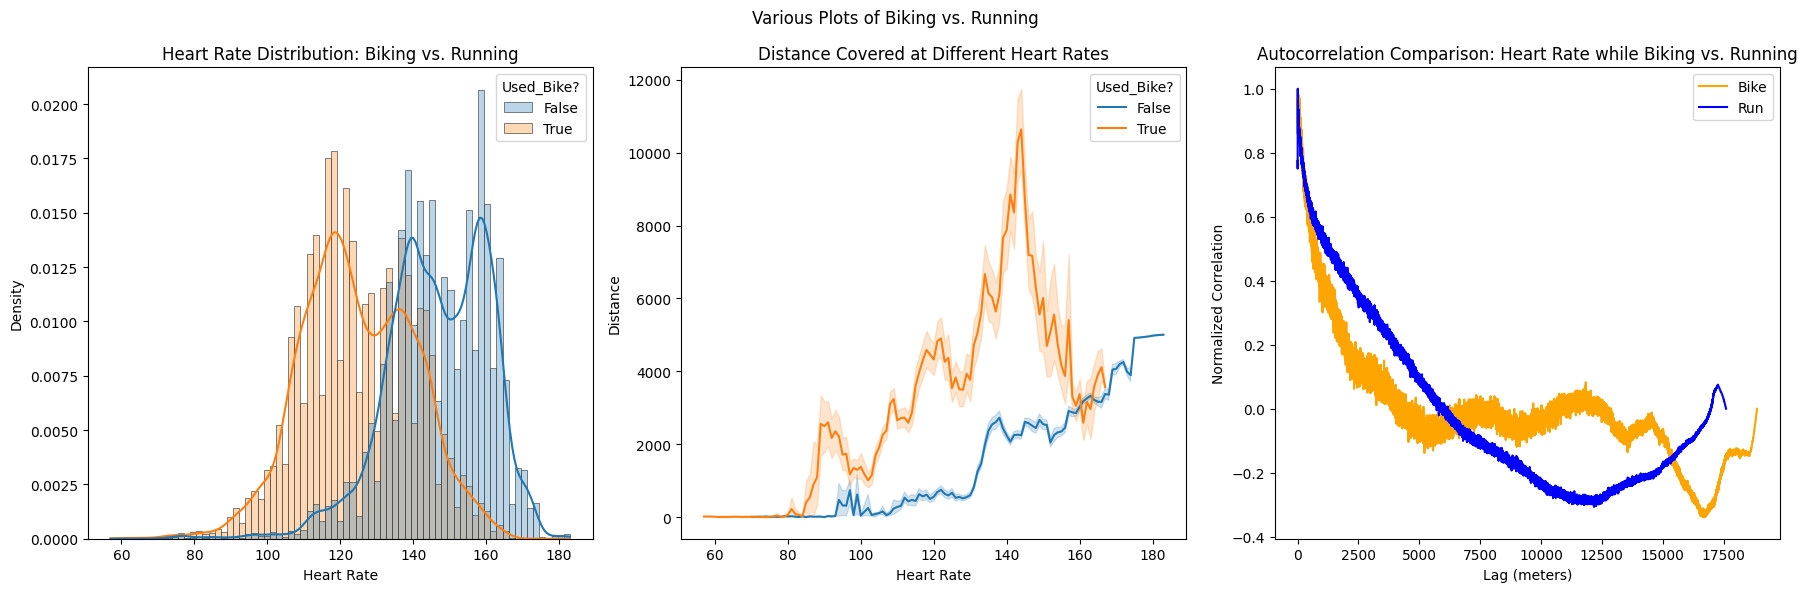

In [19]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1, 3, 1)

ax.set_title('Heart Rate Distribution: Biking vs. Running')
ax.set_xlabel('Heart Rate')
sns.histplot(
    df_filtered,
    x="heart_rate", hue="Used_Bike?",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
    ax=ax,
    kde=True,
    alpha=0.3,
    stat='density'
)
ax_line = fig.add_subplot(1, 3, 2)
ax_line.set_title('Distance Covered at Different Heart Rates')
ax_line.set_xlabel('Heart Rate')
ax_line.set_ylabel('Distance')
sns.lineplot(data=df_filtered, x='heart_rate', y='distance', hue='Used_Bike?', ax=ax_line)

ax_corr = fig.add_subplot(1, 3, 3)
plt.plot(autocorr_bike['autocorr_bike'], label='Bike', c='orange')
plt.plot(autocorr_run['autocorr_run'], label="Run", c='blue')
plt.xlabel('Lag (meters)')
plt.ylabel('Normalized Correlation')
plt.title('Autocorrelation Comparison: Heart Rate while Biking vs. Running')
plt.legend()

fig.suptitle('Various Plots of Biking vs. Running')
plt.tight_layout()
plt.show()




The histogram plot ended up being kind of what I expected. On a bike, you have the opportunity to be way more efficient and faster compared to running. Especially if you are on a road or mountain bike with the ability to change gears. I imagine that there are a lot of times where you are just coasting on a bike as well, say if you are going downhill, versus if you are running coasting is maybe dialing back your speed, but your heart rate is still going. So to me it is no surprise to see the distribution of heart rates tend to be higher for running than for biking.  

The line plot in the midle was a bit more interesting. We see that as the heart rate rises, you tend to be at farther distances, but this is only up to a certain point. Once the subject reaches a heart rate of about 160, we see the distance covered by the bike drastically decrease and actually get overtaken by running for a little bit. This could be due to "hitting a wall" while on the bike while running provides a more steady state. I could see this because in biking you are heavily relying on the flexion and extension of both your hip and knee and the tension becomes greater at times when changing gears or when going up hills. It is possible lactic acid buildup while biking is way greater than while running and could be something to pay attention to in future training sessions. If the subject finds themselves exerting really hard on a bike, it might be a good idea to pull back slightly so as not to see your distance covered crater. 

Finally the autocorrelation plot showed some periodicity while biking. That is, some oscillation of the heart rate happens as the subject increases the distance in the workout. Although in both biking and running, the correlation does go to 0 and past 0 even, biking does show peaks an valleys in the plot. This could be seen as maybe the subject doing interval training where the subject biked at certain paces for some short durations during their session. While running, the autocorrelation pretty much has a smoth decline then valley until it does come back up again. It tells me there might not be much interval training going on while running, but perhaps the increase at greater distances is a sign of starting to get warmed up and respiration being stablized during the workout to lead to a "boost" later in the session. Subsequent sessions could be recorded to see if the valley in the running autocorrelation starts to "shrink", to see an indication of better endurance. Also, for the future, it might be good to see this autocorrelation data for the biking sessions that mimic a race or fast pace with no intervals and sessions with intervals and compare the two.